In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm_notebook as tqdm_n

tqdm_n().pandas()

# INTRNLP MCO: Twitter Emoji Prediction
# Machine Learning
In this step, we build the classification model for predicting appropriate emoji given a tweet.

Note: Some of the "magic" cells contain Bash shell commands; these may not work on all platforms. However, all cells important in producing the final output have been written in Python for portability.

In [3]:
!ls data-clean

hashtags.csv           tokens_emotions.csv    tokens_spacy_clean.csv
tokens.csv             tokens_spacy.csv       tweets.csv


In [50]:
tokens = pd.read_csv('data-clean/tokens_spacy_clean.csv', dtype={'token':str}, keep_default_na=False)
tokens.head()

,index,token
0,0,vacation
1,0,waste
2,0,vacation2017
3,0,photobomb
4,0,tired


In [51]:
tokens = tokens.groupby('index').progress_apply(lambda x : ' '.join(x['token']))
tokens.head()

index
0    vacation waste vacation2017 photobomb tired va...
1    oh wynwood be so funny wynwood art itwas3am fl...
2    be friend since 7th grade look at now all foll...
3    this be what look like when someone love uncon...
4    rt this white family be invite to a black barb...
dtype: object

In [52]:
X = tokens.values

In [53]:
tweets = pd.read_csv('data-clean/tweets.csv')
tweets.head()

,text,emoji
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [54]:
y = tweets['emoji'][tokens.index].values

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train.reshape(-1, 1), y_train)
# X_train = X_train.T[0]

vec_tfidf = TfidfVectorizer(
    ngram_range=(1,1),
#     min_df=0.02,
    max_df=0.95,
    max_features=1000
#     use_idf=False
)
vec_tfidf.fit(X_train)

X_train = vec_tfidf.transform(X_train)
X_test = vec_tfidf.transform(X_test)

In [240]:
clf = ComplementNB()
# clf = LinearSVC()
clf.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [241]:
clf.score(X_train, y_train)

0.30682258821608605

In [242]:
clf.score(X_test, y_test)

0.2795238095238095

In [243]:
f1_score(y_train, clf.predict(X_train), average='weighted')

0.26567550087391184

In [244]:
f1_score(y_test, clf.predict(X_test), average='weighted')

0.2364460117409321

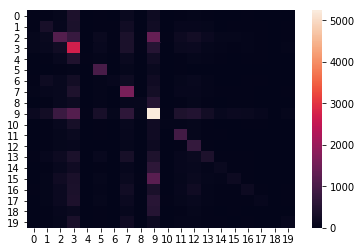

In [245]:
sns.heatmap(confusion_matrix(y_train, clf.predict(X_train)))

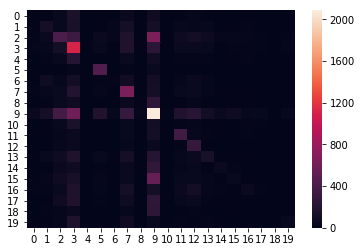

In [246]:
sns.heatmap(confusion_matrix(y_test, clf.predict(X_test)))